# Paddle Quantum Quick Start Manual

<em> Copyright (c) 2021 Institute for Quantum Computing, Baidu Inc. All Rights Reserved. </em>


# Overview

Quantum computing (QC) is a new computing model laying in the intersection of quantum mechanics and theory of computation. QC follows the fundamental laws of quantum theory to manipulate quantum bits (qubits). For many specific computational tasks, it is widely believed that quantum algorithms exhibit advantages over classical algorithms at least in theory. For a systematic introduction to the subject of QC, we refer to [1-2].

In recent years, one of the popular research topics in QC is combining the potential of quantum computing and artificial intelligence. Quantum machine learning (QML) is such an interdisciplinary subject. Researchers want to utilize the information processing advantages of quantum computing to promote the development of artificial intelligence. On the other side, it is also worth exploring the possibility of using artificial intelligence technology to break through the bottleneck of quantum computing research and development. For introductory materials about quantum machine learning, please refer to [3-5].

Here, we provide a quick start for users to get started with Paddle Quantum. Currently, you can read all the content online or download the Jupyter Notebook from our [GitHub](https://github.com/PaddlePaddle/Quantum/tree/master/introduction). In terms of content, the quick start includes the following sections:

- Introduction to quantum computing and quantum neural network (QNN)
- Introduction to Paddle Quantum
- PaddlePaddle optimizer tutorial
- A case study on quantum machine learning - Variational Quantum Eigensolver (VQE)

**Latest version updated on:** Aug. 18th, 2021 by Paddle Quantum developers.

---


# Quantum Computing Fundamentals

Quantum Computing (QC) uses unique phenomena in quantum physics (quantum superposition, quantum interference, and quantum entanglement) to design algorithms and help solve specific tasks in physics, chemistry, and optimization theory. There are several existing quantum computation models including the Adiabatic Quantum Computation (AQC) based on the adiabatic theorem and Measurement-Based Quantum Computation (MBQC). This introduction will focus on the most widely used Quantum Circuit model. In quantum circuits, the basic computation unit is the quantum bit (qubit)， which is similar to the concept of bit in classical computers. Classical bits can only be in one of the two states, 0 or 1. By comparison, qubits can not only be in states $|0\rangle$ and $|1\rangle$ but also in a superposition state (we will explain this concept later). Quantum circuit model utilize quantum logic gates to manipulate the states of these qubits. The mathematics behind this process is linear algebra in the complex domain. Here we assume the readers are already familiar with linear algebra.

## What is a qubit?

### Mathematical representation

In quantum mechanics, the state of a two-level quantum system (e.g. electron spin) can be expressed as a state vector obtained through linear combinations of the following orthonormal basis,

$$
|0\rangle := \begin{bmatrix} 1 \\ 0 \end{bmatrix}, \quad |1\rangle := \begin{bmatrix} 0 \\ 1 \end{bmatrix}.
\tag{1}
$$

The vector representation here follows the Dirac notation (bra-ket) in quantum physics. This orthonormal basis $\{|0\rangle, |1\rangle \}$ is known as the **computational basis**. Physically, one could consider $|0\rangle$ and $|1\rangle$ as the energy ground state and excited state of an atom, respectively. All possible pure states of a qubit can be regarded as normalized vectors in the two-dimensional Hilbert space. Moreover, multi-qubit states can be represented by unit vectors in high-dimensional Hilbert space where the basis is the tensor product of  $\{|0\rangle, |1\rangle\}$. For example, a 2-qubit quantum state can be represented by a unit complex vector in a 4-dimensional Hilbert space with the orthonormal basis,

$$
\left\{
|00\rangle = |0\rangle\otimes |0\rangle := \begin{bmatrix} 1 \\ 0 \\ 0 \\ 0 \end{bmatrix}, \quad 
|01\rangle = |0\rangle\otimes |1\rangle := \begin{bmatrix} 0 \\ 1 \\ 0 \\ 0 \end{bmatrix}, \quad
|10\rangle = |1\rangle\otimes |0\rangle := \begin{bmatrix} 0 \\ 0 \\ 1 \\ 0 \end{bmatrix}, \quad
|11\rangle = |1\rangle\otimes |0\rangle := \begin{bmatrix} 0 \\ 0 \\ 0 \\ 1 \end{bmatrix}
\right\}.
\tag{2}
$$

By convention, the leftmost position in ket notation represents the first qubit $q_0$, the second position represents the second qubit $q_1$, and so on. The symbol $\otimes$ denotes the tensor product operation. It works as follows: Given two matrices $A_{m\times n}$ and $B_{p \times q}$, then the tensor product of $A, B$ is

$$
A \otimes B =
\begin{bmatrix}
a_{11}B & \cdots & a_{1 n}B\\
\vdots & \ddots & \vdots \\
a_{m1}B & \cdots & a_{m n}B
\end{bmatrix}_{(mp)\times (nq)}.
\tag{3}
$$

Any single qubit quantum state $|\psi\rangle$ can be written as a linear combination (superposition) of the basis vectors $|0\rangle$ and $|1\rangle$. 

$$
|\psi\rangle = \alpha |0\rangle + \beta |1\rangle
:= \begin{bmatrix} \alpha \\ \beta \end{bmatrix}.
\tag{4}
$$

where $\alpha$ and $\beta$ are **complex numbers** referred as the probability amplitudes. According to Born Rule, the probability to find the qubit in $|0\rangle$ state is $|\alpha|^2$; and the probability of $|1\rangle$ is $|\beta|^2$. Since the sum of probabilities equals to 1, one should introduce the constraint: $|\alpha|^2 + |\beta|^2 = 1$.


### Bloch sphere representation

Bloch sphere is a clever tool for visualizing single qubit states (pure). The point on the sphere represent the possible quantum states of a single qubit. (see Figure.1)

$$
|\psi\rangle = \alpha |0\rangle + \beta |1\rangle
= \cos\bigg(\frac{\theta}{2}\bigg) |0\rangle + e^{i\varphi}\sin\bigg(\frac{\theta}{2}\bigg) |1\rangle.
\tag{5}
$$

**For a classical bit in state $|0\rangle$ or $|1\rangle$ , it corresponds to the north or south pole of the Bloch sphere. A qubit state can be not only $|0\rangle$ or $|1\rangle$ but also the superposition state of $|0\rangle$ and $|1\rangle$. So any point on the sphere corresponds to a quantum state.**

For example, the quantum state $\frac{1}{\sqrt{2}}\big(|0\rangle + i|1\rangle\big)$ is at the intersection of the equator and $+y$ axis.

<img src="figures/intro-fig-bloch.png" width="400" >

&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;  
&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;
&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;
&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;
**Figure.1** 
Bloch sphere representation of single qubit. [[Image source]](https://en.wikipedia.org/wiki/Qubit)

**Note**: The compound system of multiple qubits cannot be represented by Bloch sphere.

### Example: how to display the single qubit quantum state on the Bloch sphere?

Taking the output state of random unitary gate as an example, we show how to use the built-in function of Paddle Quantum to draw Bloch sphere. In this example, we use random rotation angles to construct random unitary operators. Let the initialized quantum circuit pass through this unitary operator, we can get the final state of the quantum circuit. This final state is a random quantum state. In this way, the sampling is repeated many times to generate a list of quantum states. By inputting them into the Bloch sphere by using the function of `utils` package in the Paddle Quantum, the display of single qubit quantum state on the Bloch sphere can be realized.

The specific codes are as follows:

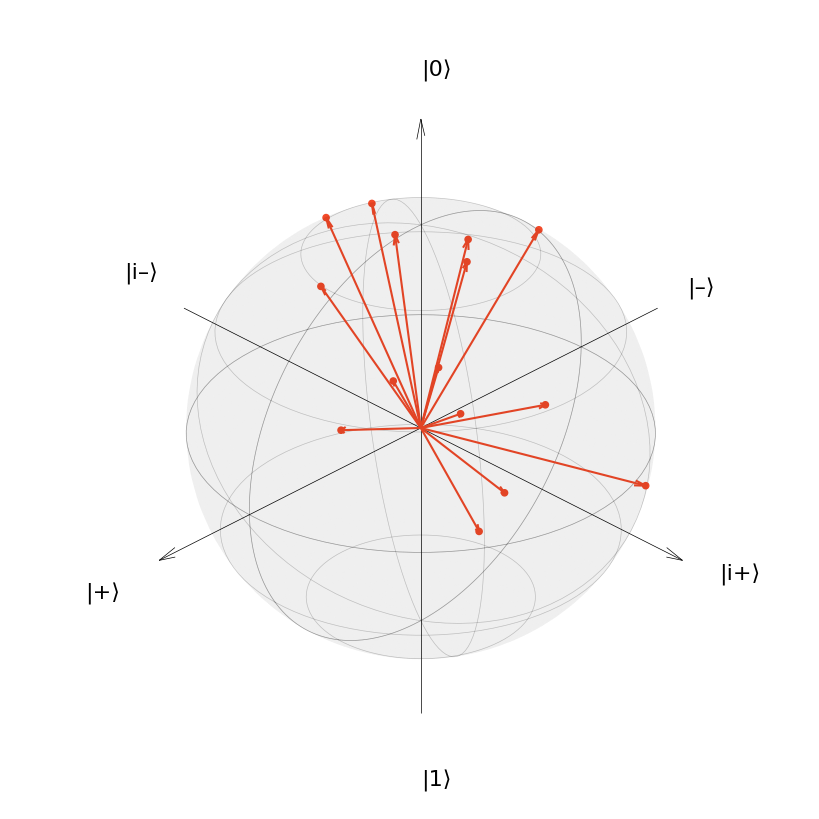

In [3]:
from paddle_quantum.circuit import UAnsatz
from paddle_quantum.utils import plot_state_in_bloch_sphere, plot_rotation_in_bloch_sphere
import numpy as np
import paddle

# Set random seed
np.random.seed(42)
# Number of samples
num_samples = 15
# Store the sampled quantum states
state = []

for i in range(num_samples):
    
    # Create a single qubit circuit
    cir = UAnsatz(1)
    # Generate random rotation angles
    phi, theta, omega = 2 * np.pi * np.random.uniform(size=3)
    phi = paddle.to_tensor(phi, dtype='float64')
    theta = paddle.to_tensor(theta, dtype='float64')
    omega = paddle.to_tensor(omega, dtype='float64')
    
    # Quantum gate operation
    cir.rz(phi, 0)
    cir.ry(theta, 0)
    cir.rz(omega, 0)
    
    # Store the sampled quantum states
    state.append(cir.run_state_vector())

# Call the Bloch sphere display function, enter the state parameter, and display the vector.
plot_state_in_bloch_sphere(state, show_arrow=True)

As shown in the figure above, we randomly sampled 15 times to generate 15 random single qubit quantum states. Display these 15 quantum states on the Bloch sphere respectively. 

The description of Bloch sphere in the Paddle Quantum has rich functions, which can provide Bloch sphere display at different angles and different viewing distances. It also supports the storage of dynamic GIF graph, which is convenient for scholars to understand and learn.

For calling richer Bloch sphere functions, please refer to API of the function `utils.plot_state_in_bloch_sphere()`. 

### Example: how to characterize the "trajectory" of the rotation of a single qubit quantum state on the Bloch sphere?

We know that the unitary operator of a single qubit can actually be regarded as rotating a Bloch vector on the Bloch sphere. The initial state of the quantum circuit corresponds to the initial Bloch vector on the Bloch sphere, and the final state of the quantum circuit corresponds to the Bloch vector after the rotation on the Bloch sphere. 

Suppose we take the state from the $|0\rangle$ state through the $R_y(\frac{\pi}{4})$ revolving gate and the $R_z(\frac{\pi}{2})$ revolving gate as the initial state of the quantum state. Take the $U3(\theta = \frac{\pi}{2}, \phi = \frac{7\pi}{8}, \lambda = 2\pi)$ revolving gate as the unitary operator to be done. How to use Bloch sphere to clearly describe the process of unitary operator operation? 

In Paddle Quantum, we use the function of `utils` package by entering `init_state` and $U3$ revolving gate to achieve this effect. 

The specific codes are as follows:

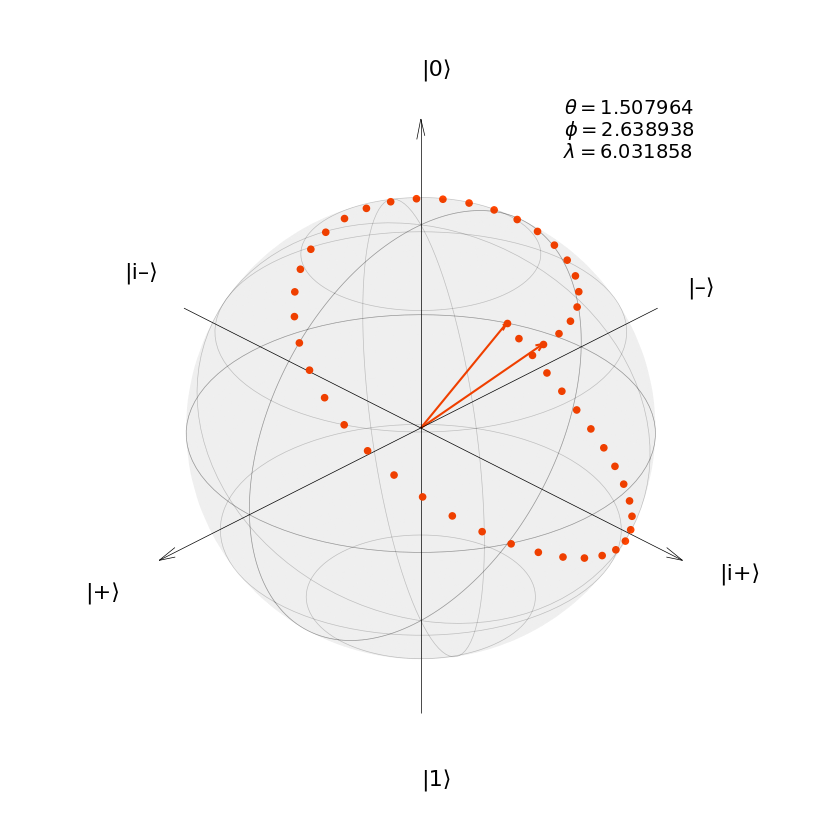

In [4]:
from paddle_quantum.circuit import UAnsatz
from paddle_quantum.utils import plot_state_in_bloch_sphere, plot_rotation_in_bloch_sphere
import numpy as np
import paddle

# Create a single qubit circuit
cir = UAnsatz(1)

# Set the initial state of the quantum state
cir.ry(paddle.to_tensor(np.pi/4, dtype="float64"), 0)
cir.rz(paddle.to_tensor(np.pi/2, dtype="float64"), 0)
init_state = cir.run_density_matrix()

# Unitary operator operation to be performed
theta = np.pi/2
phi = 7*np.pi/8
lam = 2*np.pi
rotating_angle = [theta, phi, lam]

# Call Bloch sphere display function，input init_state，rotating_angle
plot_rotation_in_bloch_sphere(init_state, rotating_angle)

As shown in the figure above, on the right is the Bloch vector corresponding to the initial quantum state, and on the left is the Bloch vector corresponding to the quantum state after the unitary operator is completed. Red dots in the middle is the "trajectory" of the quantum state in the process of unitary operator.

The description of "trajectory" of Bloch sphere in Paddle Quantum also has rich functions, which can provide Bloch sphere display at different angles and different viewing distances. It also supports the storage of dynamic GIF graph, which is convenient for scholars to understand and learn.

For calling richer Bloch sphere functions, please refer to API of the function `utils.plot_rotation_in_bloch_sphere()`. 

## What is a quantum logic gate?

In classical computers, we can apply basic logical operations (NOT gates, NAND gates, XOR gates, AND gates, and OR gates) on classical bits and combine them into more complicated operations. Quantum computing has a completely different set of logical operations, which are called quantum gates. We cannot compile existing C++ programs on a quantum computer. Because **classical computers and quantum computers have different logic gate structures, quantum algorithms need to be constructed using quantum gates**. Mathematically, a quantum gates can be expressed as a unitary matrix. Unitary operations could preserve vector length, which is a desirable property. Otherwise, if we operate on a pure state, it will be degraded into a mixed state, making it unreliable for the following running time. The unitary matrix is defined as:

$$
U^{\dagger}U = UU^{\dagger} = I,
\quad \text{and} \quad
\Vert |\psi\rangle \Vert = \Vert U|\psi\rangle\Vert = 1.
\tag{6}
$$

where $U^{\dagger}$ is the conjugate transpose of $U$, and $I$ represents the identity matrix. But what is the physical meaning of representing quantum gates as unitary matrices? This implies that all quantum gates must be reversible. For any gate logic $U$, one can always find the corresponding reverse operation $U^\dagger$. In addition, the unitary matrix must be a square matrix, because the input and output of the quantum operation require the same number of qubits. A quantum gate acting on $n$ qubits can be written as a $2^n \times 2^n$ unitary matrix. The most common quantum gates act on one or two qubits, just like classical logic gates.

### Single-qubit gate

Next, we introduce single-qubit gates in quantum computing, including the Pauli matrices $\{X, Y, Z\}$, single-bit rotation gates $\{R_x, R_y, R_z\}$ and the Hadamard gate $H$. Firstly, **NOT gate** is important for both classical and quantum computing,

$$
X := \begin{bmatrix} 0 &1 \\ 1 &0 \end{bmatrix}.
\tag{7}
$$

This quantum gate (unitary matrix) acts on the state of a single qubit (a complex vector). The operation is essentially **multiplication between a matrix and a column vector**:

$$
X |0\rangle := \begin{bmatrix} 0 &1 \\ 1 &0 \end{bmatrix} \begin{bmatrix} 1 \\0 \end{bmatrix}
=\begin{bmatrix} 0 \\1 \end{bmatrix} = |1\rangle,
\quad \text{and} \quad
X |1\rangle := \begin{bmatrix} 0 &1 \\ 1 &0 \end{bmatrix} \begin{bmatrix} 0 \\1 \end{bmatrix}
=\begin{bmatrix} 1 \\0 \end{bmatrix}=|0\rangle.
\tag{8}
$$

Recall the Bloch sphere representation, this operation $X$ acting on a qubit state (a point on the Bloch sphere) is equivalent to **a rotation about the $x$ axis in the Bloch sphere with angle $\pi$** . This is why $X$ can be expressed as $R_x(\pi)$ (differ by a global phase $e^{-i\pi/2} = -i$ ). The other two Pauli matrices $Y$ and $Z$ are very similar in this sense (representing rotation around the $y$ and $z$ axes with angle $\pi$):

$$
Y := \begin{bmatrix} 0 &-i \\ i &0 \end{bmatrix},
\quad \text{and} \quad 
Z := \begin{bmatrix} 1 &0 \\ 0 &-1 \end{bmatrix}.
\tag{9}
$$

Generally speaking, any quantum gate that rotates $\theta$ on the corresponding axis on the Bloch sphere can be expressed as

$$
R_x(\theta) := 
\begin{bmatrix} 
\cos \frac{\theta}{2} &-i\sin \frac{\theta}{2} \\ 
-i\sin \frac{\theta}{2} &\cos \frac{\theta}{2} 
\end{bmatrix}
,\quad 
R_y(\theta) := 
\begin{bmatrix}
\cos \frac{\theta}{2} &-\sin \frac{\theta}{2} \\ 
\sin \frac{\theta}{2} &\cos \frac{\theta}{2} 
\end{bmatrix}
,\quad 
R_z(\theta) := 
\begin{bmatrix}
e^{-i\frac{\theta}{2}} & 0 \\ 
0 & e^{i\frac{\theta}{2}}
\end{bmatrix}.
\tag{10}
$$

In addition to the rotation gates, the most important single-qubit gate is the Hadamard gate. The corresponding Bloch spherical interpretation consists of two separate rotations, first rotating $\pi$ around the $z$-axis, and then rotating $\pi/2$ around the $y$-axis. Its matrix representation is

$$
H := \frac{1}{\sqrt{2}}\begin{bmatrix} 1 &1 \\ 1 &-1 \end{bmatrix}.
\tag{11}
$$

### Two-bit quantum gate

We can expand the idea of single-qubit gates to multi-qubit. There are two ways to realize this expansion. The first is to apply single-qubit gates on selected qubits, while the other qubits are not operated. The figure below gives a concrete example:

![intro-fig-hadamard](./figures/intro-fig-hadamard.png "**Figure 2.** Circuit representation and interpretation of two-qubit logic operations. [[Image source]](https://en.wikipedia.org/wiki/Quantum_logic_gate)")

The quantum gate acting on two-qubit system can be expressed as a $4\times4$ unitary matrix

$$
U = H \otimes I 
= \frac{1}{\sqrt{2}} \begin{bmatrix} 1 &1 \\ 1 &-1 \end{bmatrix} 
\otimes \begin{bmatrix} 1 &0 \\ 0 &1 \end{bmatrix} 
= \frac{1}{\sqrt{2}} \,
\begin{bmatrix}
1 &0 &1 &0  \\ 
0 &1 &0 &1  \\
1 &0 &-1 &0 \\
0 &1 &0 &-1 
\end{bmatrix}.
\tag{12}
$$

Another way is to apply two-qubit gates directly. For example, $\text{CNOT}$  gate will make the state of one qubit affect another qubit state.

$$
\text{CNOT} :=
\begin{bmatrix}
1 &0 &0 &0 \\
0 &1 &0 &0 \\
0 &0 &0 &1 \\
0 &0 &1 &0
\end{bmatrix}.
\tag{13}
$$

When $\text{CNOT}$  acts on the computational basis, we have

$$
\text{CNOT} |00\rangle = |00\rangle, \quad
\text{CNOT} |01\rangle = |01\rangle, \quad
\text{CNOT} |10\rangle = |11\rangle, \quad
\text{CNOT} |11\rangle = |10\rangle.
\tag{14}
$$

We can conclude that when the first qubit is in the $|1\rangle$ state, $\text{CNOT}$ will act $X$ gate on the second qubit. If the first qubit is in the $|0\rangle$ state, then the second qubit is not affected in any way. This is why $\text{CNOT}$ stands for the controlled-$\text{NOT}$ gate. The following list contains frequently used quantum gates and their matrix representations. **All of these quantum gates can be called in Paddle Quantum**.

![intro-fig-gates](./figures/intro-fig-gates.png "**Figure 3.** List of common quantum gates. [[Image source]](https://en.wikipedia.org/wiki/Quantum_logic_gate)")

**Note**: For more information, please see the following Wikipedia [link](https://en.wikipedia.org/wiki/Quantum_logic_gate).

## What is measurement in quantum mechanics?

For a two-level quantum system, such as the spin of an electron, it can be spin up $\uparrow$ or spin down $\downarrow$, corresponding to state $|0\rangle$ and state $|1\rangle$. As mentioned before, the electron can be in a superposition state of spin up and down, which is $|\psi\rangle =\alpha |0\rangle + \beta |1\rangle$. The measurement will help us further understand what is a superposition state. It is worth noting that the measurement in quantum mechanics usually refers to a statistical result rather than a single measurement. This is due to the nature of measurements in quantum physics, which collapses the observed quantum state. For example, if we measure an electron in state $|\psi\rangle =\alpha |0\rangle + \beta |1\rangle$, we will have a probability of $|\alpha|^2$ to obtain the measurement results of spin up, and after measurement, the quantum state collapses to the post-measurement state $ |0\rangle$. Similarly, we also have a probability of $|\beta|^2$ to get the spin down post-measurement state $|1\rangle$. So if we want to get the value of $\alpha$ accurately, one experiment is obviously not enough. We need to prepare a lot of electrons in the superposition state $\alpha |0\rangle + \beta |1\rangle$, measure the spin of each electron, and then count the frequency. Measurement has a special place in quantum mechanics. If the reader finds it difficult to understand, we refer to [Measurement in Quantum Mechanics](https://en.wikipedia.org/wiki/Measurement_in_quantum_mechanics) for more information.

## Example and exercise

### Example: Using Paddle Quantum to create a $X$ gate

**Note:** All single-bit rotation gates are established as follows:

$$
R_x(\theta) :=
\begin{bmatrix}
\cos \frac{\theta}{2} &-i\sin \frac{\theta}{2} \\
-i\sin \frac{\theta}{2} &\cos \frac{\theta}{2}
\end{bmatrix}
,\quad
R_y(\theta) :=
\begin{bmatrix}
\cos \frac{\theta}{2} &-\sin \frac{\theta}{2} \\
\sin \frac{\theta}{2} &\cos \frac{\theta}{2}
\end{bmatrix}
,\quad
R_z(\theta) :=
\begin{bmatrix}
e^{-i\frac{\theta}{2}} & 0 \\
0 & e^{i\frac{\theta}{2}}
\end{bmatrix}.
\tag{15}
$$

Therefore, it is not difficult to see that the $X$ gate can be expressed as $R_x(\pi)$. The following code will generate the $X$ gate:

In [1]:
import numpy as np
import paddle
from paddle_quantum.circuit import UAnsatz
from paddle_quantum.utils import dagger, random_pauli_str_generator, pauli_str_to_matrix
from paddle_quantum.state import vec, vec_random, density_op, density_op_random, completely_mixed_computational

from paddle import matmul, transpose, trace 


# Set the angle parameter theta = pi
theta = np.array([np.pi])
    
# We need to convert numpy.ndarray to Tensor in PaddlePaddle
theta = paddle.to_tensor(theta)

# Set the number of qubits required for calculation
num_qubits = 1

# Initialize our single-bit quantum circuit
cir = UAnsatz(num_qubits)

# Apply an Rx rotation gate to the first qubit (q0), the angle is pi
which_qubit = 0
cir.rx(theta, which_qubit)

# Convert to numpy.ndarray
# Print out this quantum gate
print('The matrix representation of quantum gate is:')
print(cir.U.numpy())

The matrix representation of quantum gate is:
[[ 6.123234e-17+0.j -6.123234e-17-1.j]
 [ 6.123234e-17-1.j  6.123234e-17+0.j]]


There is a global phase $-i$ in front between the output and the $X$ (NOT) gate:

$$
\text{output} = \begin{bmatrix} 0 &-i \\ -i &0 \end{bmatrix}
= -i\begin{bmatrix} 0 &1 \\ 1 &0 \end{bmatrix} = -i X.
\tag{16}
$$

Can you figure out why such a global phase is not important in quantum computing? And not important in what sense?

### Exercise: Create a $Y$ gate

Similar to the $X$ gate, try to create a $Y$ gate by filling the following code. 

In [ ]:
theta = "your code"
 
theta = paddle.to_tensor(theta)
num_qubits = 1
cir = UAnsatz("your code")
cir.ry("your code")
print(cir.U.numpy())

As mentioned before, we have a global phase $-i$ in front:

$$
\text{output} = \begin{bmatrix} 0 &-1 \\ 1 &0 \end{bmatrix}
= -i\begin{bmatrix} 0 &-i \\ i &0 \end{bmatrix} = -i Y.
\tag{17}
$$

---

# Quantum Neural Network

After the preparations above, we now have the necessary knowledge to have a taste on quantum machine learning (QML). QML uses quantum circuits to replace classical neural networks to complete machine learning tasks. So we need to prepare a parameterized quantum circuit (PQC), which is also called Quantum neural network (QNN) or Ansatz. The quantum circuit parameters are adjustable (usually these parameters are the angles $\theta$ of rotation gates). As we have seen in the last section, using angle $\pi$ to create a $X$ gate is probably the simplest QNN. If we design an appropriate loss function, then certain computational tasks can be transformed into optimization problems. Keep adjusting the parameters in PQC until the loss function convergences. 

## Example: How to create a quantum neural network?

QNN can usually be expressed as a combination of single-qubit gates and two-qubit gates. One of the widely used circuit architectures is the hardware-efficient ansatz consists of $\{R_x, R_y, R_z, \text{CNOT}_{j,j+1} \}$. They are easy to implement on near-term devices (usually superconducting qubits) because $\text{CNOT}_{j,j+1} $ only works on adjacent qubits and hence mitigate the topological connectivity issues. The figure below gives us a concrete example:

![intro-fig-gate1](./figures/intro-fig-gate1.png)

Each horizontal line here represents a qubit. We define the upper qubit to be the first qubit $q_0$; the lower one is the second qubit $q_1$. From left to right, it represents the order that we apply quantum gates. The leftmost quantum gate will be applied first. Next, let’s take a look on how to build this simple two-qubit quantum neural network on Paddle Quantum.

In [2]:
# Set the angle parameter theta
theta = np.full([4], np.pi)
    
# We need to convert numpy.ndarray to Tensor in PaddlePaddle
theta = paddle.to_tensor(theta)

# Initialize the quantum circuit
num_qubits = 2
cir = UAnsatz(num_qubits)

# Add single-qubit rotation gates
cir.ry(theta[0], 0)
cir.ry(theta[1], 1)

# Add two-qubit gate
cir.cnot([0, 1])

# Add single-qubit rotation gates
cir.ry(theta[2], 0)
cir.ry(theta[3], 1)

print('The matrix representation of the quantum neural network U(theta=pi) in the figure is:')
print(cir.U.numpy().real)

The matrix representation of the quantum neural network U(theta=pi) in the figure is:
[[ 0.0000000e+00 -1.0000000e+00  6.1232340e-17 -6.1232340e-17]
 [-1.0000000e+00  0.0000000e+00 -6.1232340e-17  6.1232340e-17]
 [-6.1232340e-17  6.1232340e-17  1.0000000e+00  1.2246468e-16]
 [ 6.1232340e-17 -6.1232340e-17 -1.2246468e-16  1.0000000e+00]]


$$
\text{output} = 
\begin{bmatrix} 
0  &-1 &0 &0 \\ 
-1 &0  &0 &0 \\
0  &0  &1 &0 \\
0  &0  &0 &1 
\end{bmatrix}.
\tag{18}
$$

## Exercise

Given the following code, can you work out the corresponding circuit?

In [3]:
theta = np.full([6], np.pi)

theta = paddle.to_tensor(theta)

num_qubits = 3
cir = UAnsatz(num_qubits)

cir.ry(theta[0], 0)
cir.ry(theta[1], 1)
cir.ry(theta[2], 2)

cir.cnot([0, 1])
cir.cnot([1, 2])

cir.ry(theta[3], 0)
cir.ry(theta[4], 1)
cir.ry(theta[5], 2)

Answer:

![intro-fig-gate2](./figures/intro-fig-gate2.png)

You can print your circuit using Paddle Quantum as follows:

In [4]:
print(cir)

--Ry(3.142)----*----Ry(3.142)---------------
               |                            
--Ry(3.142)----X--------*--------Ry(3.142)--
                        |                   
--Ry(3.142)-------------X--------Ry(3.142)--
                                            


## Built-in circuit templates

In the latest version of Paddle Quantum, we provide some built-in circuit templates to make users' life easier.

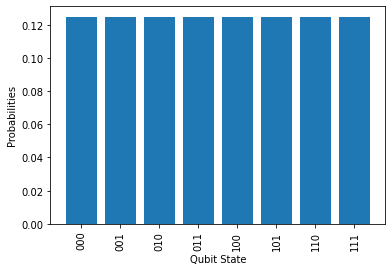

In [6]:
N = 3 # Set the number of qubits
       
# Initialize the quantum circuit
cir = UAnsatz(N)

# Apply Hadamard gate on each qubit
cir.superposition_layer()

# Prepare output state
# If the user does not enter the initial quantum state, the default initial is |00..0>
final_state = cir.run_state_vector()

# Get the theoretical value of the probability distribution, set shots = 0
res = cir.measure(shots = 0, plot = True)

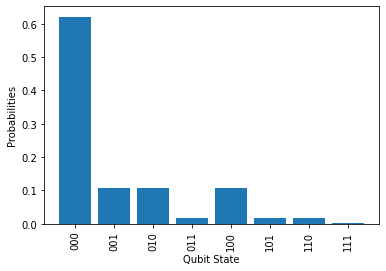

In [7]:
N = 3 # Set the number of qubits
    
# Initialize the quantum circuit
cir = UAnsatz(N)

# Apply Ry(pi/4) rotation gate on each qubit
cir.weak_superposition_layer()

# Prepare output state
# If the user does not enter the initial quantum state, the default initial state is |00..0>
final_state = cir.run_state_vector()

# Get the theoretical value of the probability distribution, set shots = 0
res = cir.measure(shots = 0, plot = True)

The following figure depicts a handy circuit template `complex_entangled_layer(theta, DEPTH)` . Users can extend the circuit architecture by changing the circuit depth parameter `DEPTH`. Define generalized rotation gate $U_3$ as

$$
U_3(\theta, \phi, \varphi) :=
\begin{bmatrix}
\cos \frac{\theta}{2} & -e^{i \varphi}\sin \frac{\theta}{2} \\
e^{i \phi}\sin \frac{\theta}{2} &e^{i (\phi+\varphi)} \cos \frac{\theta}{2}
\end{bmatrix}.
\tag{19}
$$

The $U_3$ rotation gate is equivalent to the combination of three different rotation gates:

$$
U_3(\theta, \phi, \varphi) 
= R_z(\phi)*R_y(\theta)*R_z(\varphi)
:=
\begin{bmatrix}
e^{-i\frac{\phi}{2}} & 0 \\ 
0 & e^{i\frac{\phi}{2}}
\end{bmatrix}
\begin{bmatrix}
\cos \frac{\theta}{2} &-\sin \frac{\theta}{2} \\ 
\sin \frac{\theta}{2} &\cos \frac{\theta}{2} 
\end{bmatrix}
\begin{bmatrix}
e^{-i\frac{\varphi}{2}} & 0 \\ 
0 & e^{i\frac{\varphi}{2}}
\end{bmatrix}.
\tag{20}
$$

![intro-fig-complex_entangled_layer2](./figures/intro-fig-complex_entangled_layer2.png)

When our task does not involve imaginary numbers, it is more efficient to use the circuit template `real_entangled_layer(theta, DEPTH)` ($R_y$ instead of $U_3$).

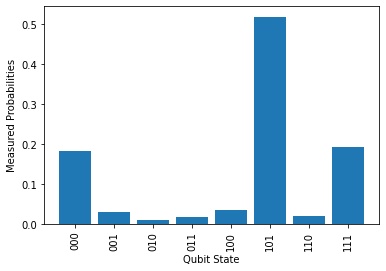

In [8]:
N = 4 # Set the number of qubits
DEPTH = 6 # Set the quantum circuit depth
theta = np.random.randn(DEPTH, N, 3)
    
# We need to convert numpy.ndarray to Tensor in PaddlePaddle
theta = paddle.to_tensor(theta)

# Initialize the quantum circuit
cir = UAnsatz(N)

# Add a complex strong entanglement structure QNN with depth D = 6 {Rz+Ry+Rz/U3 + CNOT's}
cir.complex_entangled_layer(theta, DEPTH)

# Prepare output state
# If the user does not enter the initial quantum state, the default initial is |00..0>
final_state = cir.run_state_vector()

# Measure the output state [0, 1, 2] qubits 2048 times, and count the frequency of the measurement results
res = cir.measure(shots = 2048, which_qubits = [0, 1, 2], plot = True)

---

# Operating Mode of Paddle Quantum

## Wave function vector mode

The so-called wave function mode is to use complex vectors to represent and store the quantum states. Vector mode can only handle pure states, but this mode efficiently supports **20+ qubit** operations on personal computer hardware. Users can test the limits of their computers. Under this representation, the essential operation of the quantum gate (unitary matrix) acting on qubits (a complex vector to describe the state) is **multiplying a matrix by a vector**:

$$
|\psi\rangle = U |\psi_0\rangle.
\tag{21}
$$

A function `cir.run_state_vector(input_state = None)` will be used in the following code. If we don't enter any initial quantum state, all qubits will be set into the $\lvert {0}\rangle$ state by default. Let's take a specific example:

In [9]:
N = 20 # Set the number of qubits
DEPTH = 6 # Set the quantum circuit depth
theta = np.random.randn(DEPTH, N, 1)

# Call the built-in |00..0> initial state
initial_state1 = vec(0, N)
# Call the built-in random quantum state |psi>
initial_state2 = vec_random(N)
    
# We need to convert numpy.ndarray to Tensor in PaddlePaddle
theta = paddle.to_tensor(theta)
initial_state = paddle.to_tensor(initial_state1)

# Initialize the quantum circuit
cir = UAnsatz(N)

# Add a real entanglement structure QNN {Ry+CNOT's} with depth of DEPTH
cir.real_entangled_layer(theta, DEPTH)

# Prepare output state
# If the user does not enter the initial quantum state, the default initial state is |00..0>
final_state = cir.run_state_vector(initial_state)
print(final_state.numpy())

[[ 1.08337247e-03+0.j  1.00193659e-04+0.j  1.16958435e-03+0.j ...
  -6.02439155e-04+0.j  7.83088243e-05+0.j  6.42545561e-05+0.j]]



## Density matrix mode

Paddle Quantum also supports the density matrix mode, which is to use density matrices $\rho = \sum_i P_i |\psi_i\rangle\langle\psi_i|$ to represent and store quantum states. This mode can supports **mixed state simulation** . But in density matrix mode, personal computer hardware can only support around 10 qubits. Please pay attention to this limitation. We are constantly optimizing the performance of the simulator in this mode. Under this representation, quantum gates (unitary matrices) acting on the quantum states (Hermitian matrix with a trace of 1) can be viewed as **matrix multiplication**:

$$
\rho = U \rho_0 U^\dagger.
\tag{22}
$$

Function `cir.run_density_matrix()` will be used in the following code. Here is an  example:

In [10]:
N = 2 # Set the number of qubits
DEPTH = 6 # Set the quantum circuit depth
theta = np.random.randn(DEPTH, N, 1)

# Call the built-in |00..0><00..0| initial state
initial_state1 = density_op(N)
# Call the built-in random quantum state, you can specify whether to allow complex number elements and matrix rank
initial_state2 = density_op_random(N, real_or_complex=2, rank=4)
# Call the complete mixed state under the built-in calculation base
initial_state3 = completely_mixed_computational(N)

# We need to convert numpy.ndarray to Tensor in PaddlePaddle
theta = paddle.to_tensor(theta)
initial_state = paddle.to_tensor(initial_state1)

# Initialize the quantum circuit
cir = UAnsatz(N)

# Add a real number strong entanglement structure QNN {Ry+CNOT's} with depth of DEPTH
cir.real_entangled_layer(theta, DEPTH)

# Prepare output state
# If the user does not enter the initial quantum state, the default initial is |00..0><00..0|
final_state = cir.run_density_matrix(initial_state)
print(final_state.numpy())

[[ 0.86516792+0.j  0.08806816+0.j -0.21659148+0.j  0.2489669 +0.j]
 [ 0.08806816+0.j  0.00896474+0.j -0.02204753+0.j  0.02534312+0.j]
 [-0.21659148+0.j -0.02204753+0.j  0.05422285+0.j -0.06232791+0.j]
 [ 0.2489669 +0.j  0.02534312+0.j -0.06232791+0.j  0.0716445 +0.j]]


### Exercise: How to prepare Bell states from computational basis

Bell state is a widely used quantum entangled state, which can be expressed as

$$
|\Phi^+\rangle = \frac{1}{\sqrt{2}} \big(|00\rangle + |11\rangle\big)
= \frac{1}{\sqrt{2}} \,
\begin{bmatrix}
1 \\
0 \\
0 \\
1
\end{bmatrix}.
\tag{23}
$$

So how do we use Paddle Quantum to prepare a Bell state? We can use the following quantum circuit :

![intro-fig-bell2](./figures/intro-fig-bell2.png)

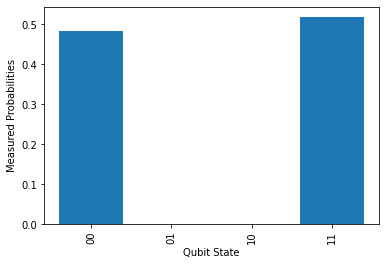

The Bell state is:
 [0.70710678+0.j 0.        +0.j 0.        +0.j 0.70710678+0.j]


In [11]:
# Initialize the quantum circuit
cir = UAnsatz(2)

# Add quantum gates
cir.h(0)
cir.cnot([0, 1])

# If the user does not enter the initial quantum state, the default initial is |00..0>
output_state = cir.run_state_vector()

# We measure the output state 2048 times and obtain the frequency distribution of the measurement results
cir.measure(shots = 2048, plot = True)

print('The Bell state is:\n', output_state.numpy())

---

# PaddlePaddle Optimizer Tutorial

## Example: Using gradient descent in PaddlePaddle to optimize multivariable functions


In this section, we will learn how to use an optimizer in PaddlePaddle to find the minimum value of a multivariable function, for example,

$$
\mathcal{L}(\theta_1, \theta_2, \theta_3)
= (\theta_1)^2 + (\theta_2)^2 + (\theta_3)^2 + 10.
\tag{24}
$$

It is clear when $\theta_1 = \theta_2 = \theta_3 = 0$, $\mathcal{L}$ takes the minimum value of 10.

In [12]:
# Set hyper parameter
theta_size = 3
ITR = 200 # Set the number of iterations
LR = 0.5  # Set the learning rate
SEED = 1  # Fix random number seed
paddle.seed(SEED)

class Optimization_ex1(paddle.nn.Layer):
    
    def __init__(self, shape, dtype='float64'):
        super(Optimization_ex1, self).__init__()
        
        # Initialize a list of learnable parameters with length theta_size
        # Use the uniform distribution of [-5, 5] to fill the initial value
        self.theta = self.create_parameter(shape=shape, 
                                           default_initializer=paddle.nn.initializer.Uniform(low=-5., high=5.), 
                                           dtype=dtype, is_bias=False)

    # Define loss function and forward propagation mechanism
    def forward(self):
        loss = self.theta[0] ** 2 + self.theta[1] ** 2 + self.theta[2] ** 2 + 10
        return loss
    
# Record intermediate optimization results
loss_list = []
parameter_list = []
    
# Define network dimensions
myLayer = Optimization_ex1([theta_size])

# Use Adam optimizer to get relatively good convergence
# Of course you can change to SGD or RMSprop.
opt = paddle.optimizer.Adam(
learning_rate = LR, parameters = myLayer.parameters())

# Iteration of optimization
for itr in range(ITR):

    # Forward propagation calculates the loss function
    loss = myLayer()[0]

    # Backpropagation optimizes the loss function
    loss.backward()
    opt.minimize(loss)
    opt.clear_grad()

    # Record the learning process
    loss_list.append(loss.numpy()[0])
    parameter_list.append(myLayer.parameters()[0].numpy())

print('The minimum value of the loss function is:', loss_list[-1])

The minimum value of the loss function is: 10.000000010745854


### Exercise: Finding Eigenvalues

Next, let's try a more complicated loss function. First, we introduce a random Hermitian matrix $H$ whose **eigenvalues** are the diagonal elements of matrix $D$, where

$$
D = \begin{bmatrix} 0.2 &0 \\ 0 &0.8 \end{bmatrix}.
\tag{25}
$$

Don't worry, we will help you generate this Hermitian matrix $H$.

Initialize the parameter vector $\boldsymbol{\theta}$ to construct a simple linear operation $U(\boldsymbol{\theta}) = R_z(\theta_1)*R_y(\theta_2)*R_z(\theta_3)$:

$$
U(\theta_1, \theta_2, \theta_3) =
\begin{bmatrix}
e^{-i\frac{\theta_1}{2}} & 0 \\
0 & e^{i\frac{\theta_1}{2}}
\end{bmatrix}
\begin{bmatrix}
\cos \frac{\theta_2}{2} &-\sin \frac{\theta_2}{2} \\
\sin \frac{\theta_2}{2} &\cos \frac{\theta_2}{2}
\end{bmatrix}
\begin{bmatrix}
e^{-i\frac{\theta_3}{2}} & 0 \\
0 & e^{i\frac{\theta_3}{2}}
\end{bmatrix}.
\tag{26}
$$

Multiply this matrix (ansatz) by $|0\rangle$ to get a new 2-dimensional complex vector

$$
|\phi\rangle = U(\theta_1, \theta_2, \theta_3)|0\rangle.
\tag{27}
$$

Then, we define the loss function as

$$
\mathcal{L}(\theta_1, \theta_2, \theta_3)
= \langle\phi| H |\phi\rangle
= \langle0| U^{\dagger}H U |0\rangle.
\tag{28}
$$

Let's see what we got after optimization!

In [13]:
from scipy.stats import unitary_group

# V is a 2x2 random unitary matrix
V = unitary_group.rvs(2)

# The diagonal elements in D are the eigenvalue of H
# You can change the diagonal element value here
D = np.diag([0.2, 0.8])

# V_dagger is the Hermitian transpose of V
V_dagger = V.conj().T

# @: Represents matrix multiplication
H = (V @ D @ V_dagger)
print('The randomly generated matrix H according to the spectral decomposition is:')
print(H,'\n')
print('The eigenvalues of H are:')
print(np.linalg.eigh(H)[0])

The randomly generated matrix H according to the spectral decomposition is:
[[ 0.26680964+0.j         -0.06472222-0.17729436j]
 [-0.06472222+0.17729436j  0.73319036+0.j        ]] 

The eigenvalues of H are:
[0.2 0.8]


In [14]:
# Hyper parameter settings
theta_size = 3 # set theta dimension
num_qubits = 1 # Set the number of qubits
ITR = 50 # Set the number of iterations
LR = 0.5 # Set the learning rate
SEED = 1 # Fix random seed for initializing theta parameter
paddle.seed(SEED)

# Set the circuit module separately
def U_theta(theta):
    
    # Initialize the circuit and add the quantum gates
    cir = UAnsatz(num_qubits)
    cir.rz(theta[0], 0)
    cir.ry(theta[1], 0)
    cir.rz(theta[2], 0)
    
    # Return parameterized matrix
    return cir.U

In [15]:
class Optimization_ex2(paddle.nn.Layer):
    
    def __init__(self, shape, dtype='float64'):
        super(Optimization_ex2, self).__init__()
        
        # Initialize a list of trainable parameters with length theta_size
        # And use the uniform distribution of [0, 2*pi] to fill the initial value
        self.theta = self.create_parameter(shape=shape, 
                                           default_initializer=paddle.nn.initializer.Uniform(low=0., high=2*np.pi), 
                                           dtype=dtype, is_bias=False)
        self.H = paddle.to_tensor(H)
        
    # Define loss function and forward propagation mechanism
    def forward(self):
        
        # Get the unitary matrix representation of the quantum neural network
        U = U_theta(self.theta)
        
        # Conjugate transpose operation
        U_dagger = dagger(U)
        
        # Calculate the loss function
        loss = paddle.real(matmul(U_dagger, matmul(self.H, U)))[0][0]
        
        return loss

In [16]:
loss_list = []
parameter_list = []

myLayer = Optimization_ex2([theta_size])

# SGD optimizer
opt = paddle.optimizer.SGD(learning_rate = LR, parameters = myLayer.parameters())

# Optimization cycle
for itr in range(ITR):

    # Forward propagation calculates loss function
    loss = myLayer()[0]

    # Back propagation minimizes the loss function
    loss.backward()
    opt.minimize(loss)
    opt.clear_grad()

    # Record the learning curve
    loss_list.append(loss.numpy()[0])
    parameter_list.append(myLayer.parameters()[0].numpy())
    if itr % 5 == 0:
        print('iter:', itr, 'loss: %.4f'% loss.numpy())

print('The minimum value of the loss function is:', loss_list[-1])

iter: 0 loss: 0.6071
iter: 5 loss: 0.4024
iter: 10 loss: 0.2953
iter: 15 loss: 0.2710
iter: 20 loss: 0.2666
iter: 25 loss: 0.2654
iter: 30 loss: 0.2643
iter: 35 loss: 0.2627
iter: 40 loss: 0.2601
iter: 45 loss: 0.2563
The minimum value of the loss function is: 0.25196530073166423


We can change the eigenvalues of $H$. If the diagonal matrix after diagonalization is changed to

$$
D = \begin{bmatrix} 0.8 &0 \\ 0 &1.2 \end{bmatrix}.
\tag{29}
$$

We still get the minimum eigenvalue of $\lambda_{\text{min}}(H)=0.8$. Can you find the reason behind it? Or is there any theory behind this?

---

# Quantum Machine Learning Case Study

## Variational Quantum Eigensolver - Unsupervised Learning

At this stage, large-scale fault-tolerant quantum computers are still far from us. We can only build noisy intermediate-scale quantum (NISQ) computing devices. A promising type of algorithm suitable for NISQ devices is the quantum-classical hybrid algorithm, or variational quantum algorithms. People expect that this approach could surpass the performance of classical computers in certain applications. Among which, the Variational Quantum Eigensolver (VQE) is such an important application. It uses a parameterized circuit to search the vast Hilbert space and uses the gradient descent or other classical optimization methods to find the optimal parameters, which yield a state that is close to the ground state of a given Hamiltonian (find the minimum eigenvalue of a Hermitian matrix). Let's go through the following two-qubit example.

Suppose we want to find the ground state of the following Hamiltonian:

$$
H = 0.4 \, Z \otimes I + 0.4 \, I \otimes Z + 0.2 \, X \otimes X.
\tag{30}
$$

Given the following quantum neural network architecture

![intro-fig-vqeAnsatz](./figures/intro-fig-vqeAnsatz.png)

We have learned how to build this circuit. If you forget, please go to section **Quantum Neural Network**.

In [17]:
# First generate the Hamiltonian under Pauli string representation
# H_info is equivalent to 0.4*kron(I, Z) + 0.4*kron(Z, I) + 0.2*kron(X, X)
# Among them, X, Y, Z are the Pauli matrix and I is the identity matrix
H_info = [[0.4,'z0'], [0.4,'z1'], [0.2,'x0,x1']]

# Set hyper parameter
num_qubits = 2
theta_size = 4
ITR = 60
LR = 0.4
SEED = 999
paddle.seed(SEED)

# Convert the Hamiltonian into matrix representation
H_matrix = pauli_str_to_matrix(H_info, num_qubits)

In [18]:
class vqe_demo(paddle.nn.Layer):
    
    def __init__(self, shape, dtype='float64'):
        super(vqe_demo, self).__init__()
        
        # Initialize a list of learnable parameters with length theta_size
        # Use the uniform distribution of [0, 2*pi] to fill the initial value
        self.theta = self.create_parameter(shape=shape, 
                                           default_initializer=paddle.nn.initializer.Uniform(low=0., high=2*np.pi), 
                                           dtype=dtype, is_bias=False)
        
    # Define loss function and forward propagation mechanism
    def forward(self):
        
        # Initial quantum circuit
        cir = UAnsatz(num_qubits)
        
        # Add quantum gates
        cir.ry(self.theta[0], 0)
        cir.ry(self.theta[1], 1)
        cir.cnot([0, 1])
        cir.ry(self.theta[2], 0)
        cir.ry(self.theta[3], 1)
        
        # Choose state vector operation mode
        cir.run_state_vector()
        
        # Calculate the expected value of H_info in the current quantum state
        # The formula is given by <psi|H|psi>
        loss = cir.expecval(H_info)
        
        return loss

In [19]:
loss_list = []
parameter_list = []

# Define network dimensions
vqe = vqe_demo([theta_size])

# We usually use Adam optimizer to get relatively good convergence
# Of course you can change it to SGD, Adagrad, or RMS prop as we did here.
opt = paddle.optimizer.Adam(
  learning_rate = LR, parameters = vqe.parameters())

# Optimization cycle
for itr in range(ITR):

    # Forward propagation calculates loss function
    loss = vqe()

    # Back propagation minimizes the loss function
    loss.backward()
    opt.minimize(loss)
    opt.clear_grad()

    # Record the learning curve
    loss_list.append(loss.numpy()[0])
    parameter_list.append(vqe.parameters()[0].numpy())
    if itr % 10 == 0:
        print('iter:', itr, 'loss: %.4f'% loss.numpy())


print('The calculated ground state energy is:', loss_list[-1])
print('The real ground state energy is:', np.linalg.eigh(H_matrix)[0][0])

iter: 0 loss: -0.2202
iter: 10 loss: -0.7239
iter: 20 loss: -0.8156
iter: 30 loss: -0.8172
iter: 40 loss: -0.8205
iter: 50 loss: -0.8241
The calculated ground state energy is: -0.8243637430772154
The real ground state energy is: -0.8246211251235321


_______

## References

[1] Nielsen, M. A. & Chuang, I. L. Quantum computation and quantum information. (Cambridge university press, 2010).

[2] Phillip Kaye, Laflamme, R. & Mosca, M. An Introduction to Quantum Computing. (2007).

[3] Biamonte, J. et al. Quantum machine learning. [Nature 549, 195–202 (2017).](https://www.nature.com/articles/nature23474)

[4] Schuld, M., Sinayskiy, I. & Petruccione, F. An introduction to quantum machine learning. [Contemp. Phys. 56, 172–185 (2015).](https://www.tandfonline.com/doi/abs/10.1080/00107514.2014.964942)

[5] Benedetti, M., Lloyd, E., Sack, S. & Fiorentini, M. Parameterized quantum circuits as machine learning models. [Quantum Sci. Technol. 4, 043001 (2019).](https://iopscience.iop.org/article/10.1088/2058-9565/ab4eb5)

[6] [Peruzzo, A. et al. A variational eigenvalue solver on a photonic quantum processor. Nat. Commun. 5, 4213 (2014).](https://www.nature.com/articles/ncomms5213)

[7] [McClean, J. R., Romero, J., Babbush, R. & Aspuru-Guzik, A. The theory of variational hybrid quantum-classical algorithms. New J. Phys. 18, 023023 (2016).](https://iopscience.iop.org/article/10.1088/1367-2630/18/2/023023)

[8] [Kandala, A. et al. Hardware-efficient variational quantum eigensolver for small molecules and quantum magnets. Nature 549, 242–246 (2017).](https://www.nature.com/articles/nature23879)

[9] [Mitarai, K., Negoro, M., Kitagawa, M. & Fujii, K. Quantum circuit learning. Phys. Rev. A 98, 032309 (2018).](https://journals.aps.org/pra/abstract/10.1103/PhysRevA.98.032309)